In [35]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
df = pd.read_csv("data/csv/test_subset.csv")
stop_words = stopwords.words('english') 

print(df.head())
print(len(df))

   Unnamed: 0  Unnamed: 0.1 testament_title book_id           book_title  \
0           0             0   old_testament     b_1  the_book_of_genesis   
1           1             1   old_testament     b_1  the_book_of_genesis   
2           2             2   old_testament     b_1  the_book_of_genesis   
3           3             3   old_testament     b_1  the_book_of_genesis   
4           4             4   old_testament     b_1  the_book_of_genesis   

  verse_id bible_verse  #chars  #words  \
0      p_1        1:1.      47      10   
1      p_2        1:2.     123      28   
2      p_3        1:3.      48      13   
3      p_4        1:4.      84      19   
4      p_5        1:5.      96      21   

                                                text       TTR  novelty  
0    In the beginning God created heaven, and earth.  1.000000      1.0  
1  And the earth was void and empty, and darkness...  0.714286      1.0  
2   And God said: Be light made. And light was made.  0.692308      

In [37]:
def cosine_similarity(rvector): 
    c = 0
    for i in range(len(rvector)): 
        c+= l1[i]*l2[i]
        
    return c / float((sum(l1)*sum(l2))**0.5)

In [40]:
sim_matrix = np.zeros((len(df), len(df)))

In [41]:
for i, row in df.iterrows():
    text1 = new_string = re.sub(r'[^\w\s]', '', row["text"])
    sent1 = word_tokenize(text1)
    x = set([w for w in sent1 if not w in stop_words])
    
    for j in range(i, len(df)):
        l1 = []
        l2 = []
        
        text2 = new_string = re.sub(r'[^\w\s]', '', df.iloc[j]["text"])
        sent2 = word_tokenize(text2)
        
        y = set([w for w in sent2 if not w in stop_words])
        
        rvector = x.union(y) 
        for w in rvector:
            l1.append(1) if w in x else l1.append(0)
            l2.append(1) if w in y else l2.append(0)
        
        cosine = cosine_similarity(rvector)
        sim_matrix[i, j] = cosine
        sim_matrix[j, i] = cosine
        
print(sim_matrix)

[[1.         0.23570226 0.16666667 ... 0.1028689  0.         0.        ]
 [0.23570226 1.         0.23570226 ... 0.0727393  0.         0.08333333]
 [0.16666667 0.23570226 1.         ... 0.05143445 0.         0.11785113]
 ...
 [0.1028689  0.0727393  0.05143445 ... 1.         0.11396058 0.18184824]
 [0.         0.         0.         ... 0.11396058 1.         0.        ]
 [0.         0.08333333 0.11785113 ... 0.18184824 0.         1.        ]]


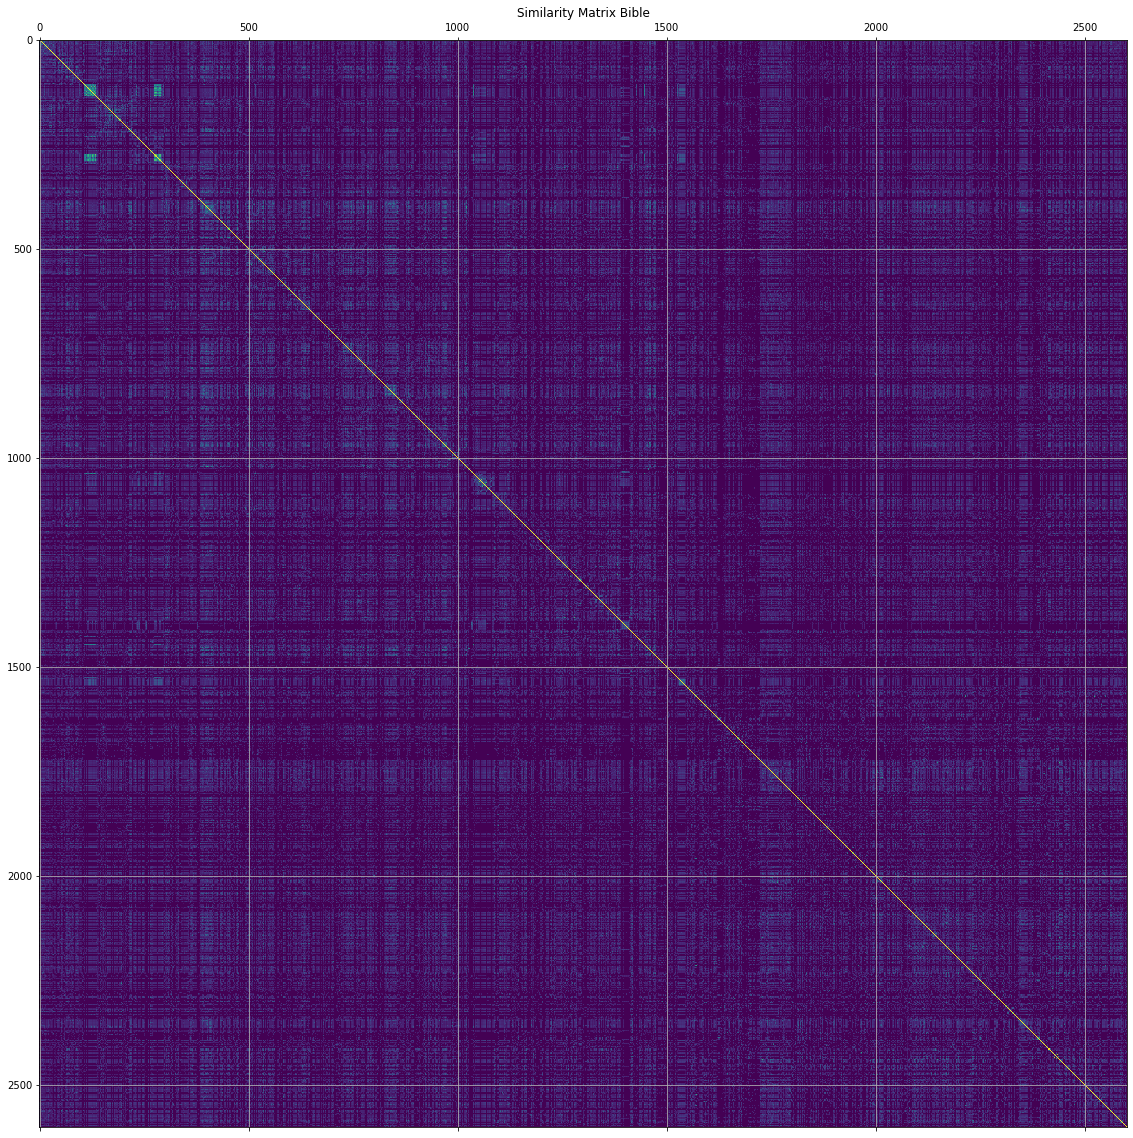

In [43]:
#cmap = cm.get_cmap('RdYlGn')

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(sim_matrix, interpolation='nearest')
ax.grid(True)
plt.title('Similarity Matrix Bible')
plt.show()